In [1]:
from common_imports import*

In [2]:
data = '/Applications/Kaushik/North Texas/Education/Semester 5, Fall 2024/Project/Fresh start/CSV/q2.csv'
df = pd.read_csv(data)

In [3]:
# Subtract 'Column2' from 'Column1' and store the result in a new column 'Result'
df['diff_delivery'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

In [4]:
print(df.head())

   Days for shipping (real)  Days for shipment (scheduled) Department Name  \
0                         3                              4         Fitness   
1                         5                              4         Fitness   
2                         4                              4         Fitness   
3                         3                              4         Fitness   
4                         2                              4         Fitness   

         Market  diff_delivery  
0  Pacific Asia             -1  
1  Pacific Asia              1  
2  Pacific Asia              0  
3  Pacific Asia             -1  
4  Pacific Asia             -2  


In [5]:
# Create a new column with if-else logic
df['late_delivery'] = np.where(df['diff_delivery'] < 0, 'On Time', 'Late')

print(df.head())

   Days for shipping (real)  Days for shipment (scheduled) Department Name  \
0                         3                              4         Fitness   
1                         5                              4         Fitness   
2                         4                              4         Fitness   
3                         3                              4         Fitness   
4                         2                              4         Fitness   

         Market  diff_delivery late_delivery  
0  Pacific Asia             -1       On Time  
1  Pacific Asia              1          Late  
2  Pacific Asia              0          Late  
3  Pacific Asia             -1       On Time  
4  Pacific Asia             -2       On Time  


In [6]:
df_copy = df.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis = 1)

print(df_copy.head())

  Department Name        Market  diff_delivery late_delivery
0         Fitness  Pacific Asia             -1       On Time
1         Fitness  Pacific Asia              1          Late
2         Fitness  Pacific Asia              0          Late
3         Fitness  Pacific Asia             -1       On Time
4         Fitness  Pacific Asia             -2       On Time


In [ ]:
# Data set is loaded into a variable named 'data'

# Group by 'Department Name' and 'Market' to calculate late delivery stats
late_delivery_analysis = df_copy.groupby(['Department Name', 'Market']).agg(
    total_orders=('late_delivery', 'count'),
    late_orders=('late_delivery', lambda x: (x == 'Late').sum()),
    on_time_orders=('late_delivery', lambda x: (x == 'On Time').sum())
).reset_index()

# Calculate the proportion of late deliveries
late_delivery_analysis['late_percentage'] = (
    late_delivery_analysis['late_orders'] / late_delivery_analysis['total_orders'] * 100
)

# Sort by the highest late delivery percentage
late_delivery_analysis = late_delivery_analysis.sort_values(by='late_percentage', ascending=False)

# Display the results
print(late_delivery_analysis)

       Department Name        Market  total_orders  late_orders  \
35            Pet Shop  Pacific Asia           492          397   
30            Outdoors        Africa           632          496   
17             Fitness  Pacific Asia           780          608   
5            Book Shop        Europe           308          238   
28                Golf          USCA          5082         3917   
0              Apparel        Africa          3162         2434   
7           Discs Shop        Europe           348          267   
29  Health and Beauty   Pacific Asia           362          277   
4              Apparel          USCA          7111         5440   
22            Footwear  Pacific Asia          3021         2308   
3              Apparel  Pacific Asia         11103         8480   
10            Fan Shop        Europe         18265        13945   
24                Golf        Africa          2219         1694   
19            Footwear        Africa           985          75

In [8]:
print(late_delivery_analysis.head())

   Department Name        Market  total_orders  late_orders  on_time_orders  \
35        Pet Shop  Pacific Asia           492          397              95   
30        Outdoors        Africa           632          496             136   
17         Fitness  Pacific Asia           780          608             172   
5        Book Shop        Europe           308          238              70   
28            Golf          USCA          5082         3917            1165   

    late_percentage  
35        80.691057  
30        78.481013  
17        77.948718  
5         77.272727  
28        77.075954  


/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/1479475434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette="viridis")


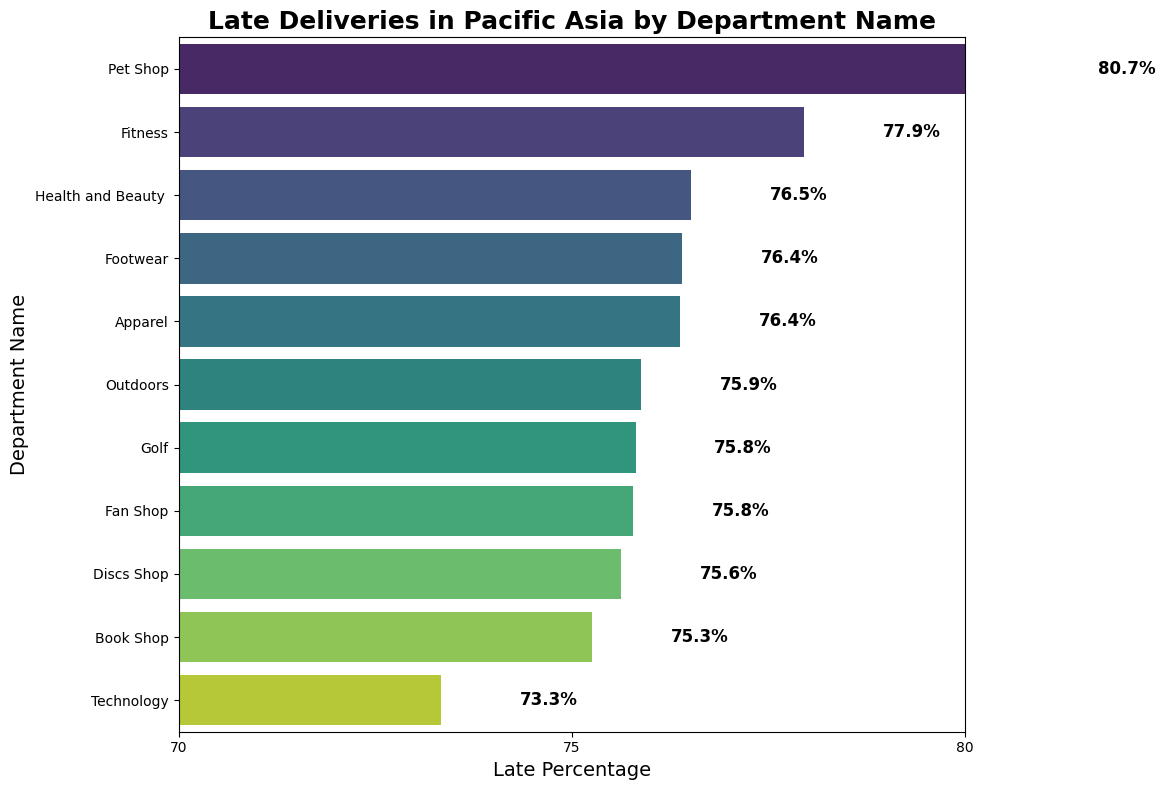

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/1479475434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette="viridis")


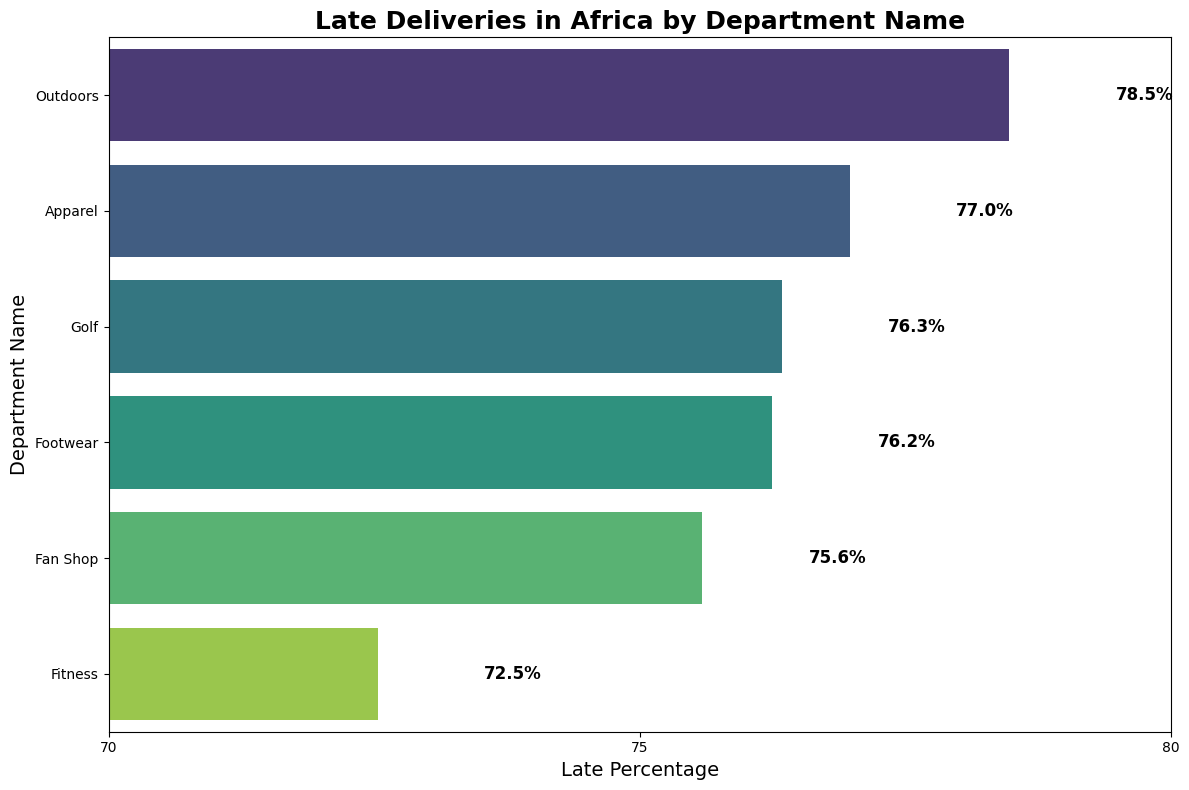

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/1479475434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette="viridis")


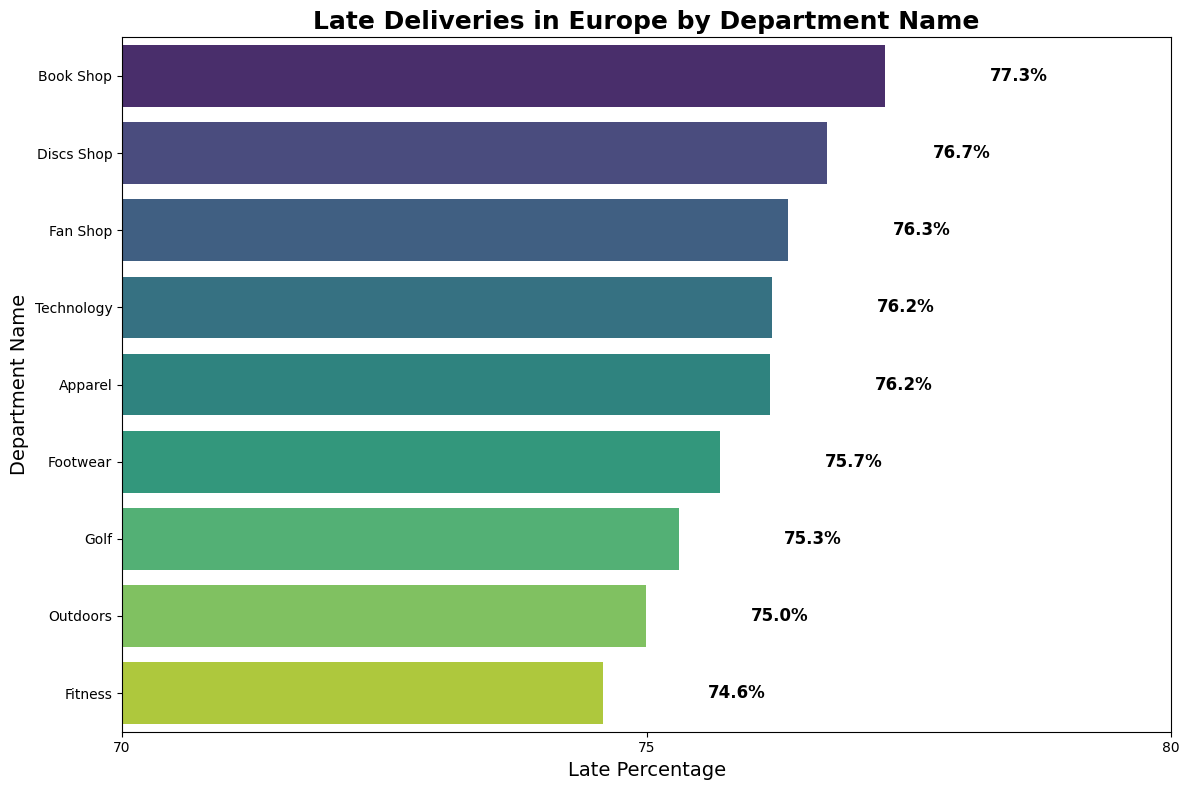

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/1479475434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette="viridis")


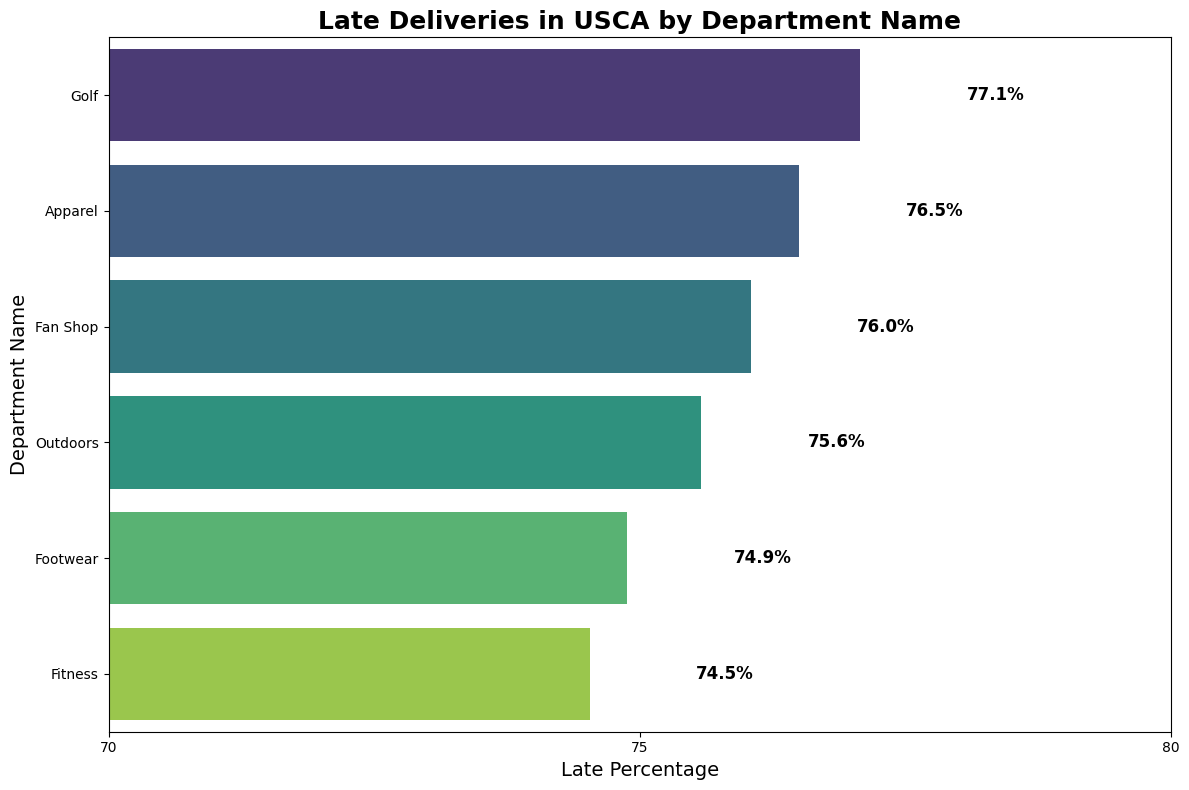

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/1479475434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette="viridis")


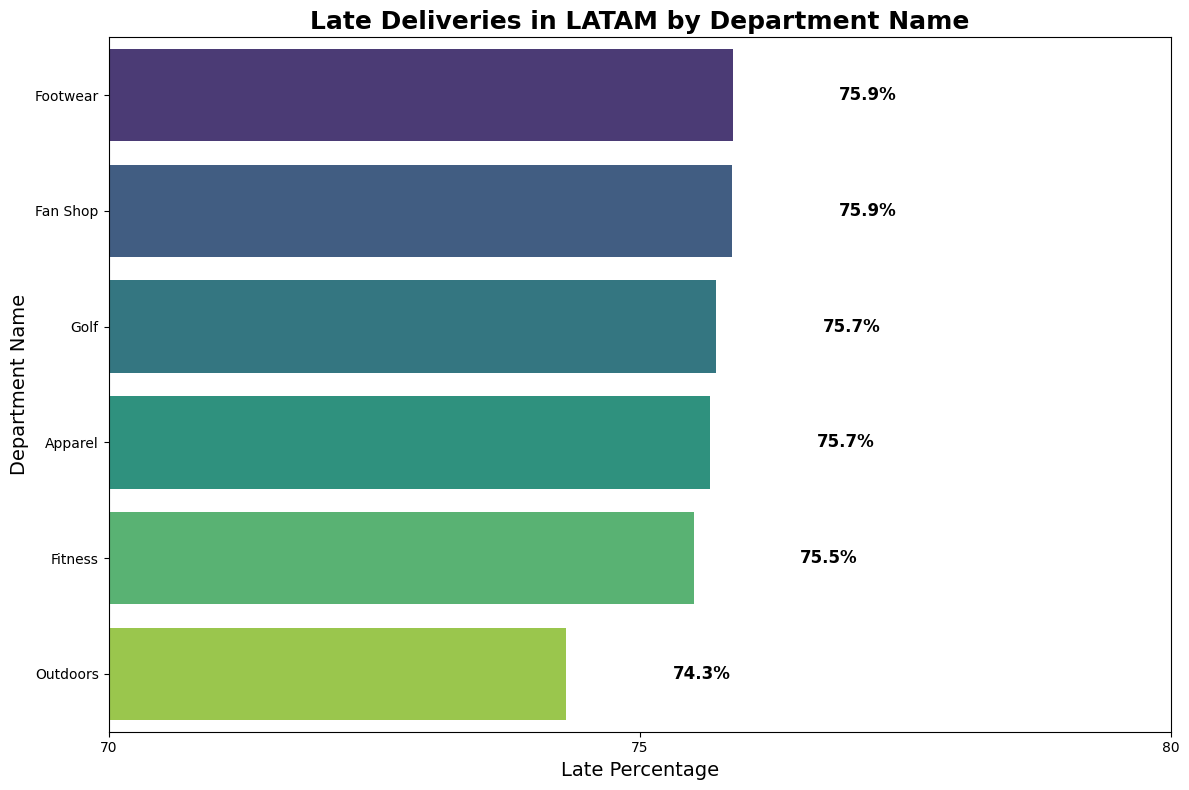

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of unique markets
markets = late_delivery_analysis['Market'].unique()

color_palette = sns.color_palette("coolwarm", len(markets))

# Create a separate plot for each market
for market in markets:
    # Filter data for the current market
    market_data = late_delivery_analysis[late_delivery_analysis['Market'] == market]
    
    # Group by 'Department Name' and calculate average late_percentage
    market_grouped = market_data.groupby(['Department Name'])['late_percentage'].mean().reset_index()
    
    # Sort the data by late percentage
    market_grouped = market_grouped.sort_values(by='late_percentage', ascending=False)
    
    # Create the plot for the current market
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette="viridis")
    
    # Add value labels to each bar
    for index, value in enumerate(market_grouped['late_percentage']):
        ax.text(value + 1, index, f'{value:.1f}%', va='center', fontweight='bold', fontsize=12)

    # Adjust the x-axis to start from 60 and have closer step intervals
    plt.xlim(70, 80)  # Set the x-axis range to start from 60
    plt.xticks(range(70, 81, 5))  # Set the step to 5 between ticks

    # Add labels and title with large font size
    plt.title(f'Late Deliveries in {market} by Department Name', fontsize=18, fontweight='bold')
    plt.xlabel('Late Percentage', fontsize=14)
    plt.ylabel('Department Name', fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()


/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)
/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)


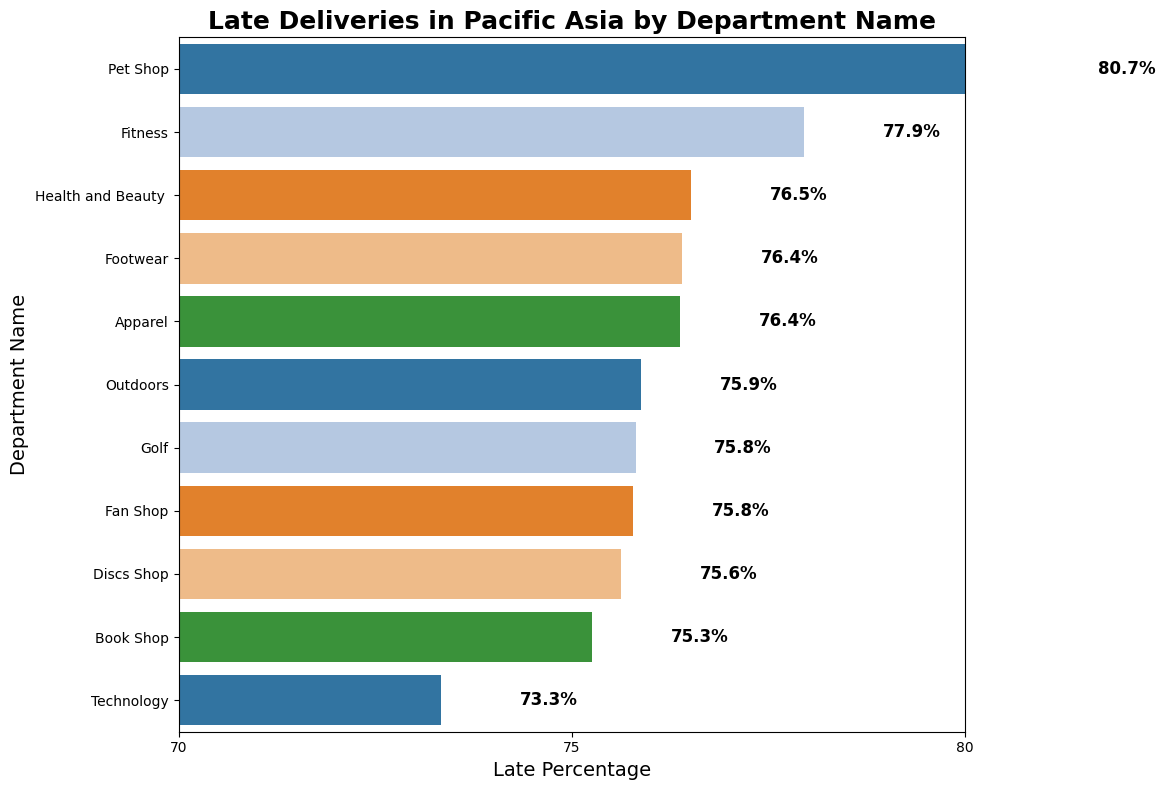

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)
/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)


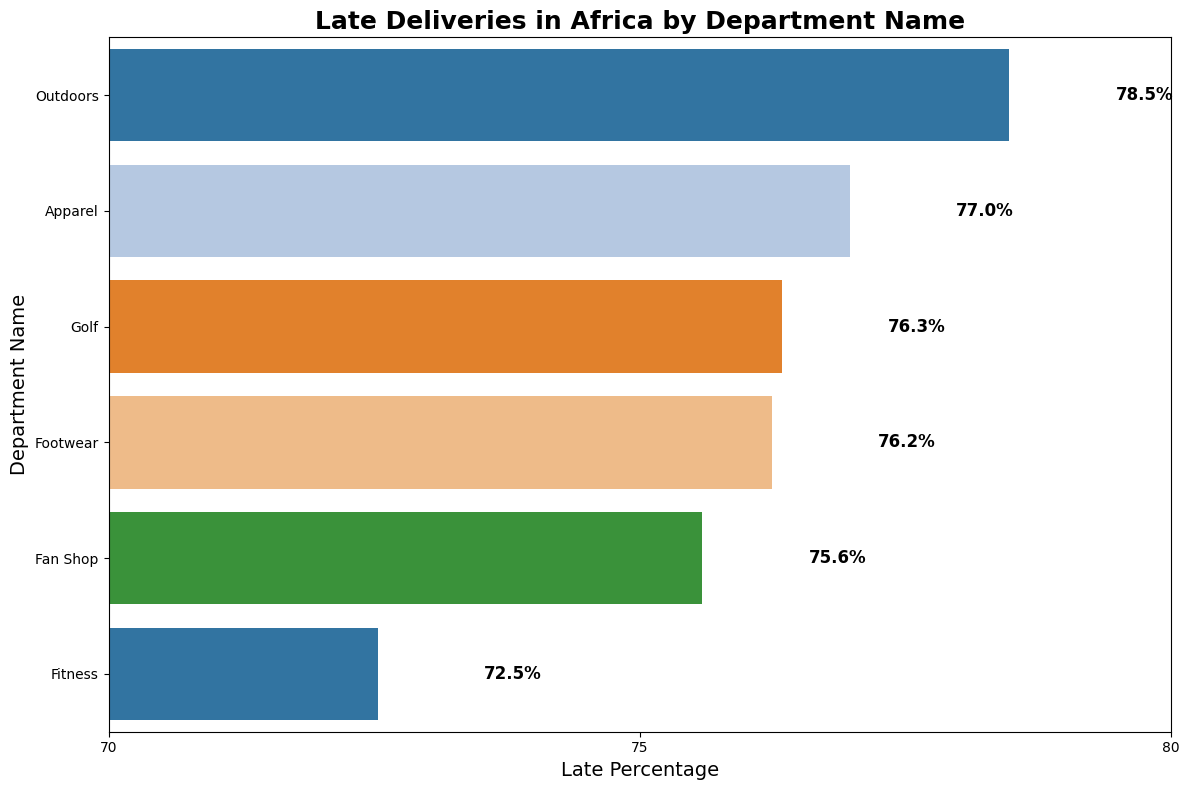

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)
/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)


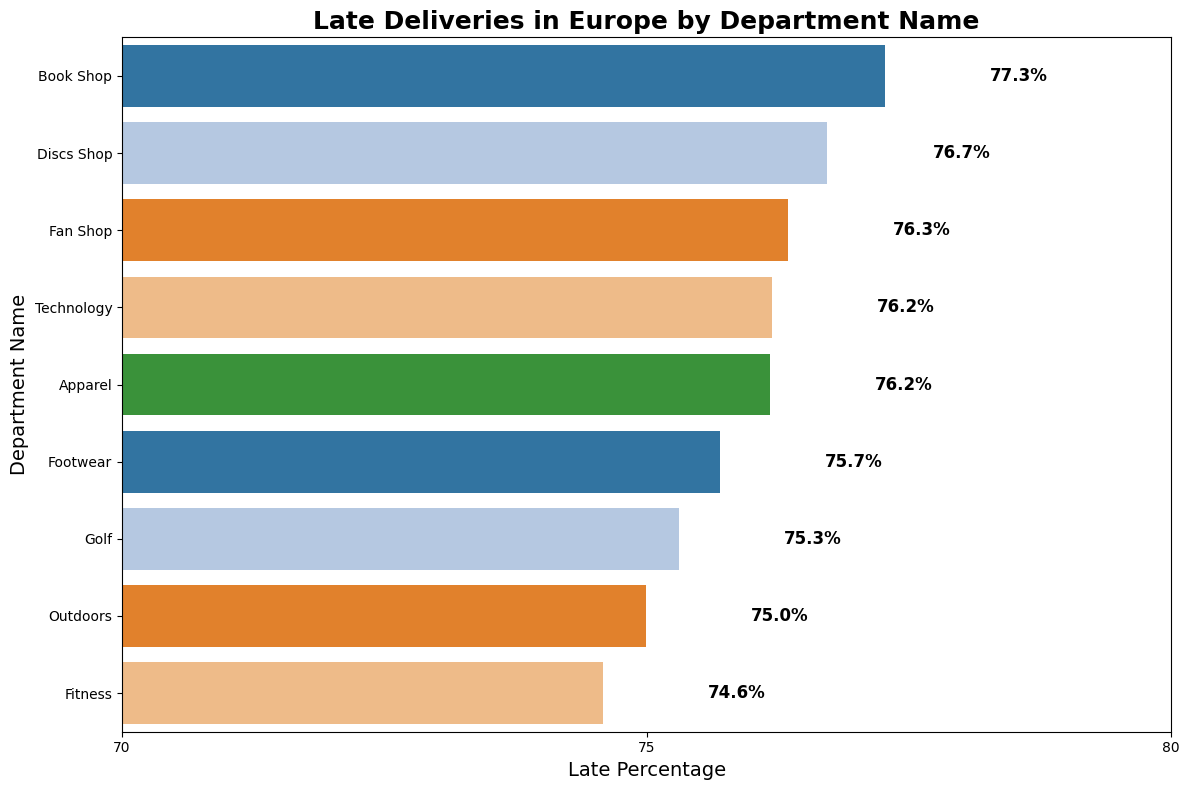

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)
/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)


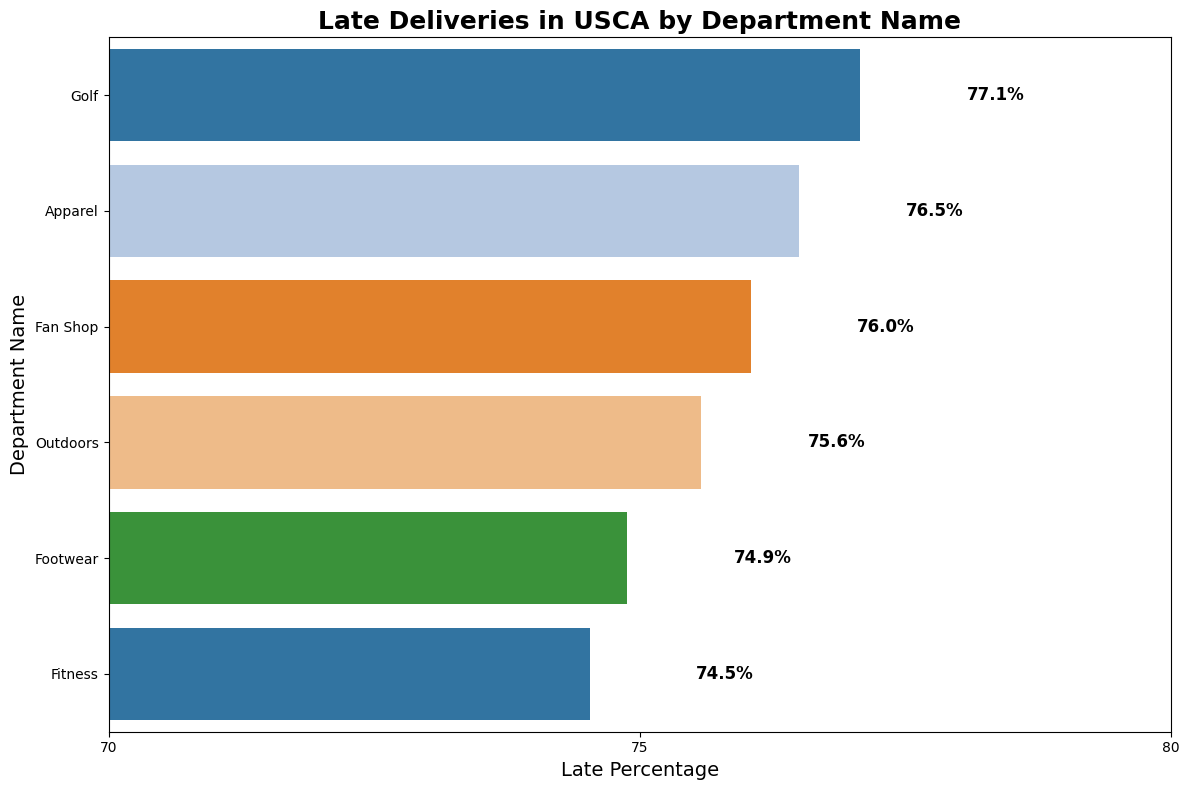

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)
/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/325777021.py:23: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)


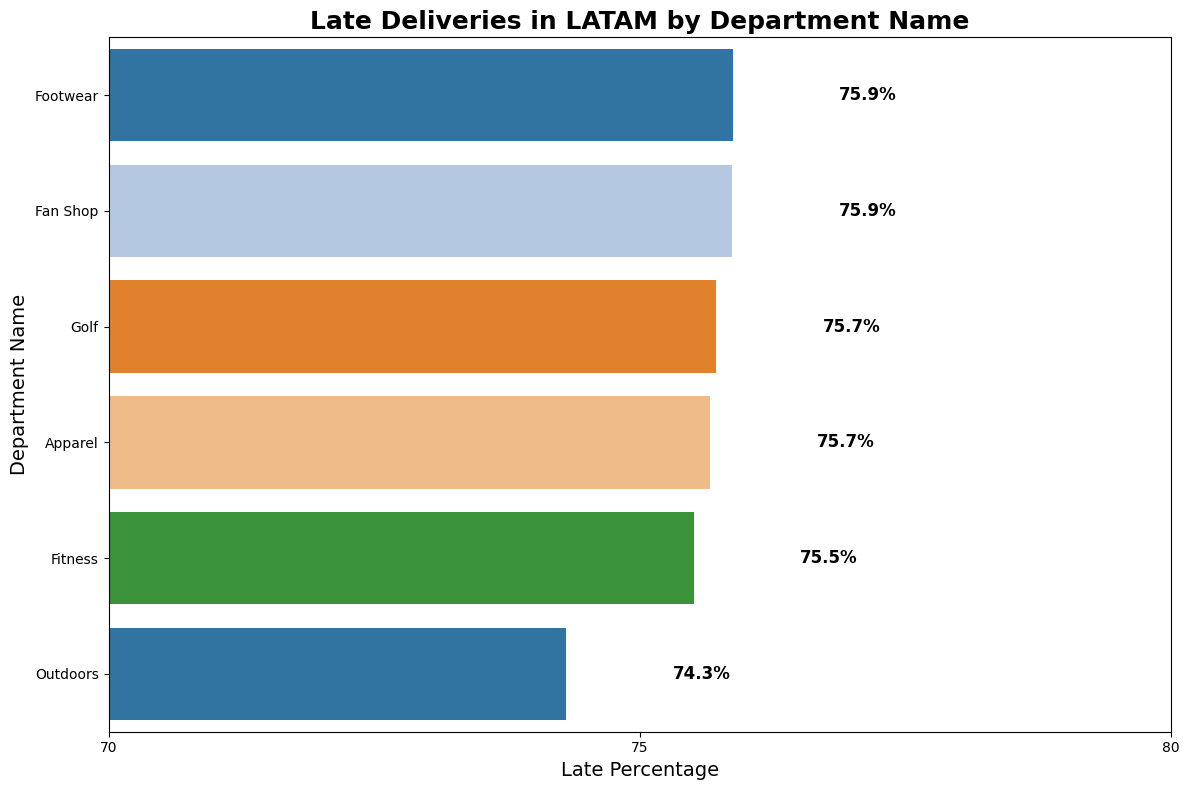

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of unique markets
markets = late_delivery_analysis['Market'].unique()

color_palette = sns.color_palette("tab20", len(markets))

# Create a separate plot for each market
for market in markets:
    # Filter data for the current market
    market_data = late_delivery_analysis[late_delivery_analysis['Market'] == market]
    
    # Group by 'Department Name' and calculate average late_percentage
    market_grouped = market_data.groupby(['Department Name'])['late_percentage'].mean().reset_index()
    
    # Sort the data by late percentage
    market_grouped = market_grouped.sort_values(by='late_percentage', ascending=False)
    
    # Create the plot for the current market
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=market_grouped, x='late_percentage', y='Department Name', palette=color_palette)
    
    # Add value labels to each bar
    for index, value in enumerate(market_grouped['late_percentage']):
        ax.text(value + 1, index, f'{value:.1f}%', va='center', fontweight='bold', fontsize=12)

    # Adjust the x-axis to start from 70 and have closer step intervals
    plt.xlim(70, 80)  # Set the x-axis range to start from 70
    plt.xticks(range(70, 81, 5))  # Set the step to 5 between ticks

    # Add labels and title with large font size
    plt.title(f'Late Deliveries in {market} by Department Name', fontsize=18, fontweight='bold')
    plt.xlabel('Late Percentage', fontsize=14)
    plt.ylabel('Department Name', fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()


/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/2941634723.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=late_delivery_analysis, x='late_percentage', y='Department Name', palette="tab20")


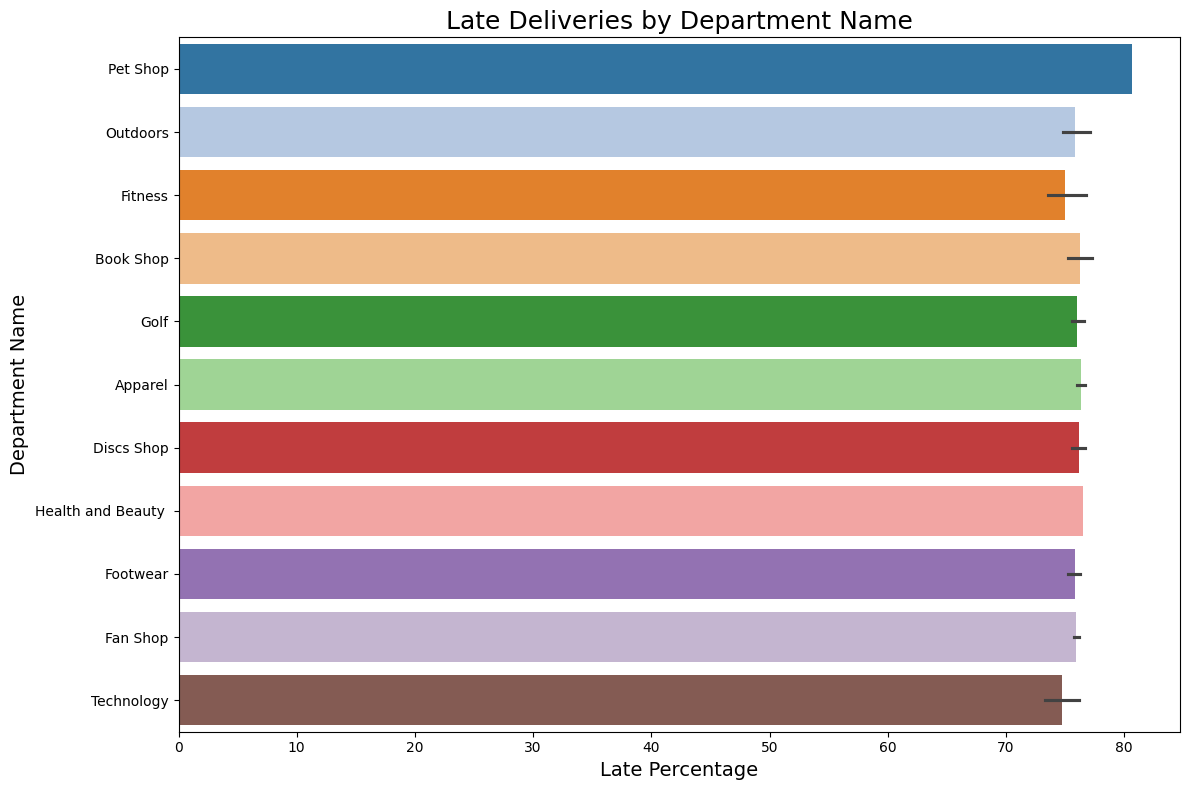

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. **Bar Graph 1: Late Deliveries by Department Name**
plt.figure(figsize=(12, 8))
sns.barplot(data=late_delivery_analysis, x='late_percentage', y='Department Name', palette="tab20")
plt.title('Late Deliveries by Department Name', fontsize=18)
plt.xlabel('Late Percentage', fontsize=14)
plt.ylabel('Department Name', fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/3293421352.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=late_delivery_analysis, x='late_percentage', y='Department Name', palette="tab20")


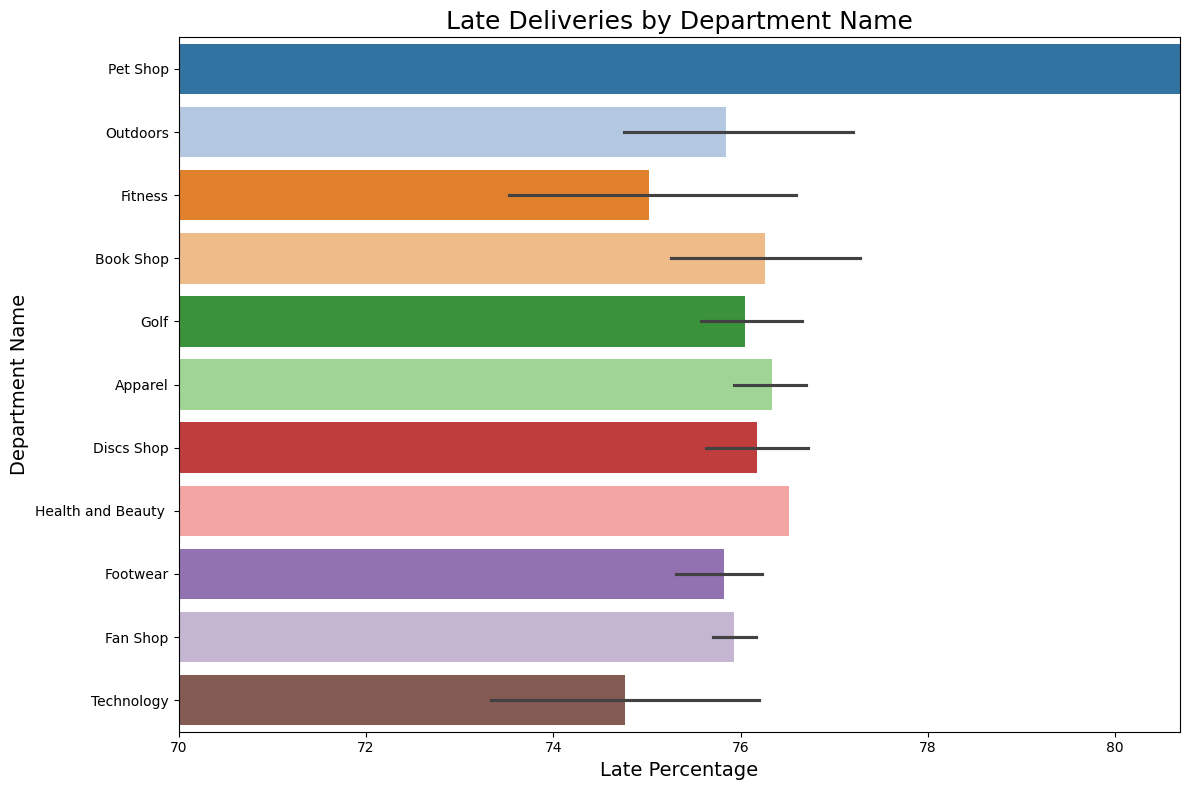

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. **Bar Graph 1: Late Deliveries by Department Name**
plt.figure(figsize=(12, 8))
sns.barplot(data=late_delivery_analysis, x='late_percentage', y='Department Name', palette="tab20")
plt.title('Late Deliveries by Department Name', fontsize=18)
plt.xlabel('Late Percentage', fontsize=14)
plt.ylabel('Department Name', fontsize=14)

 
plt.xlim(70, late_delivery_analysis['late_percentage'].max())  # Adjust the maximum limit automatically

plt.tight_layout()
plt.show()

/var/folders/dy/q97w3m8s3x7fb9c0bfysclz00000gn/T/ipykernel_15808/3186439335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_late_percentage_by_market, x='Market', y='late_percentage', palette="tab20")


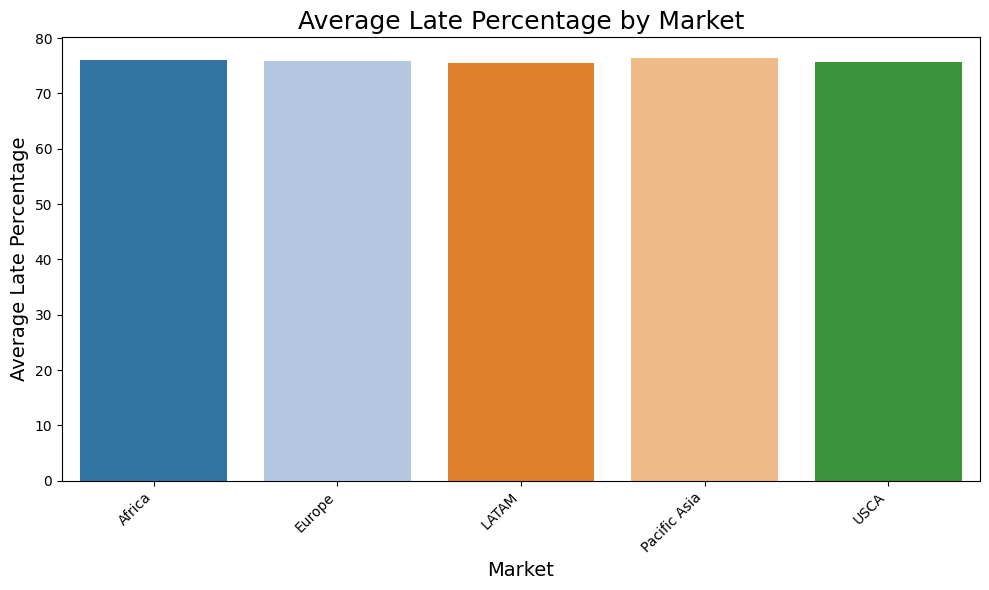

In [13]:

# 2. **Bar Graph 2: Average Late Percentage by Market**
avg_late_percentage_by_market = late_delivery_analysis.groupby('Market')['late_percentage'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_late_percentage_by_market, x='Market', y='late_percentage', palette="tab20")
plt.title('Average Late Percentage by Market', fontsize=18)
plt.xlabel('Market', fontsize=14)
plt.ylabel('Average Late Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


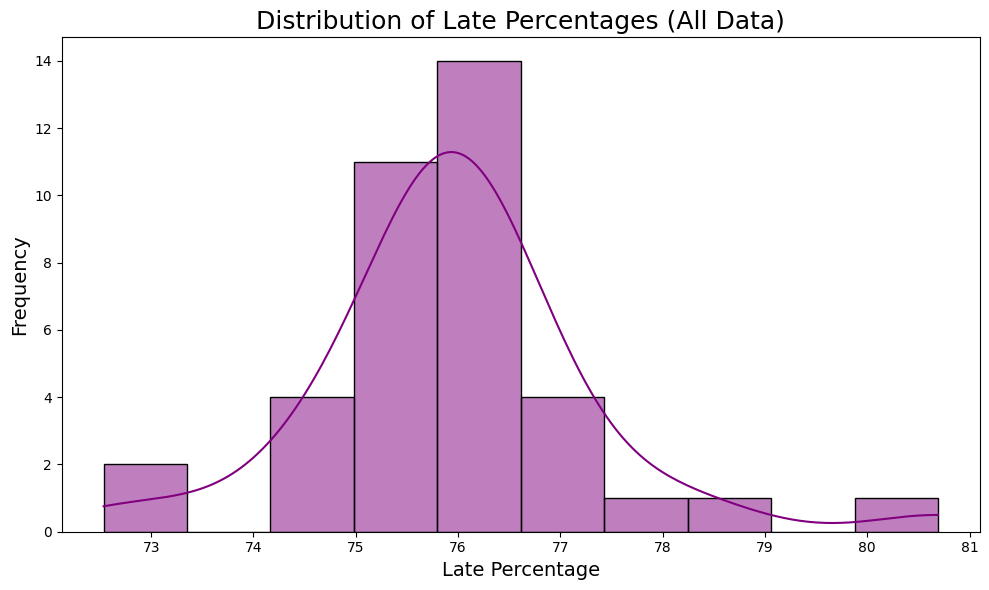

In [14]:

# 3. **Histogram 1: Distribution of Late Percentages (All Data)**
plt.figure(figsize=(10, 6))
sns.histplot(late_delivery_analysis['late_percentage'], bins=10, kde=True, color='purple')
plt.title('Distribution of Late Percentages (All Data)', fontsize=18)
plt.xlabel('Late Percentage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()


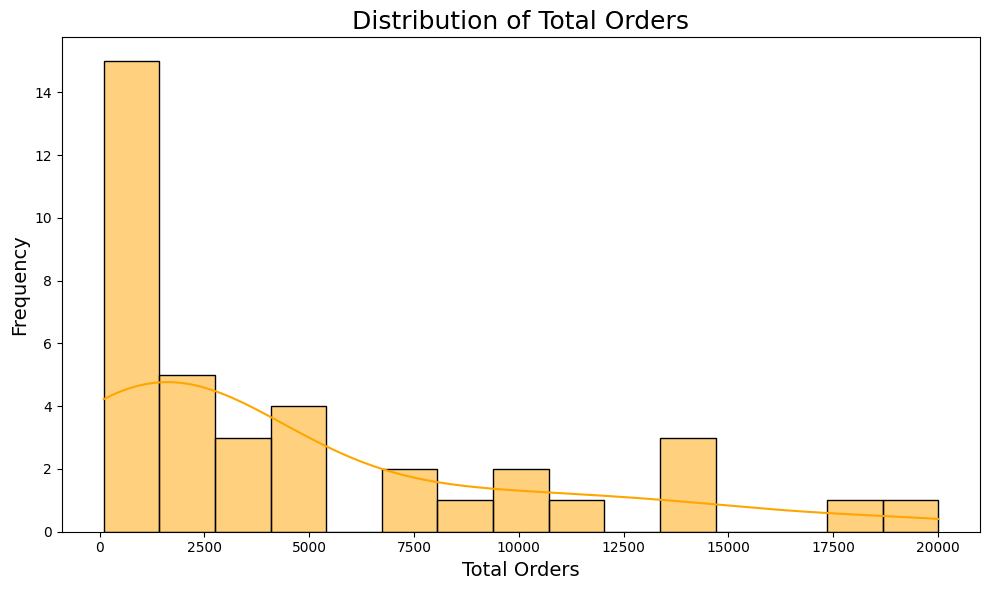

In [15]:
plt.show()

# 4. **Histogram 2: Distribution of Total Orders**
plt.figure(figsize=(10, 6))
sns.histplot(late_delivery_analysis['total_orders'], bins=15, kde=True, color='orange')
plt.title('Distribution of Total Orders', fontsize=18)
plt.xlabel('Total Orders', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()


In [16]:

# 5. **Pie Chart 1: Proportion of Late vs. On-time Orders (All Data)**
late_vs_on_time = late_delivery_analysis.groupby('Department Name').agg({
    'late_orders': 'sum',
    'on_time_orders': 'sum'
}).reset_index()

late_vs_on_time['Total'] = late_vs_on_time['late_orders'] + late_vs_on_time['on_time_orders']
late_vs_on_time['Late Percentage'] = late_vs_on_time['late_orders'] / late_vs_on_time['Total'] * 100
late_vs_on_time['On Time Percentage'] = late_vs_on_time['on_time_orders'] / late_vs_on_time['Total'] * 100


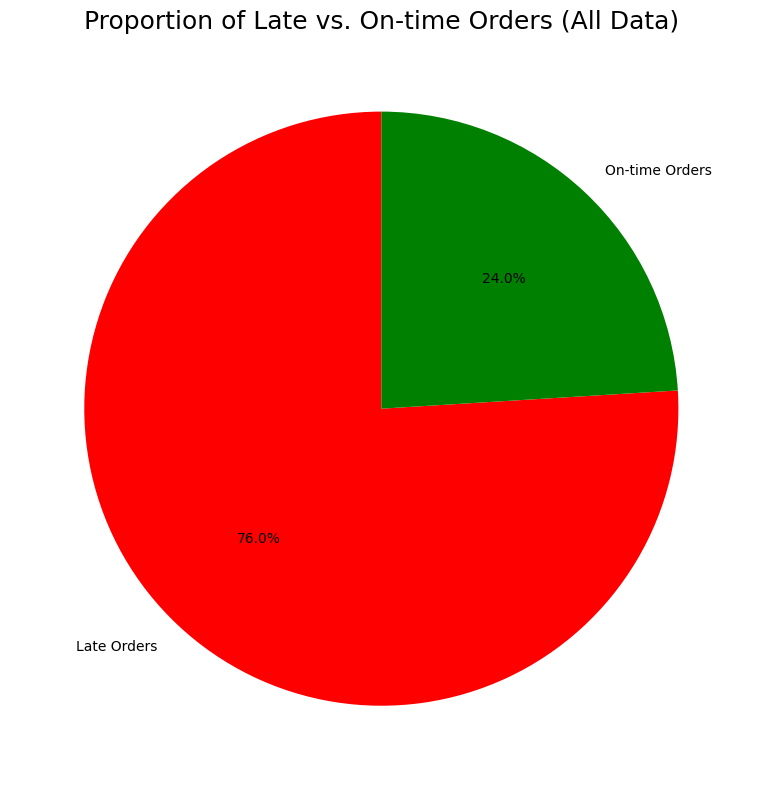

In [17]:

# Pie chart for the first department (for simplicity)
plt.figure(figsize=(8, 8))
late_counts = [late_vs_on_time['late_orders'].sum(), late_vs_on_time['on_time_orders'].sum()]
labels = ['Late Orders', 'On-time Orders']
colors = ['red', 'green']
plt.pie(late_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Late vs. On-time Orders (All Data)', fontsize=18)
plt.tight_layout()
plt.show()


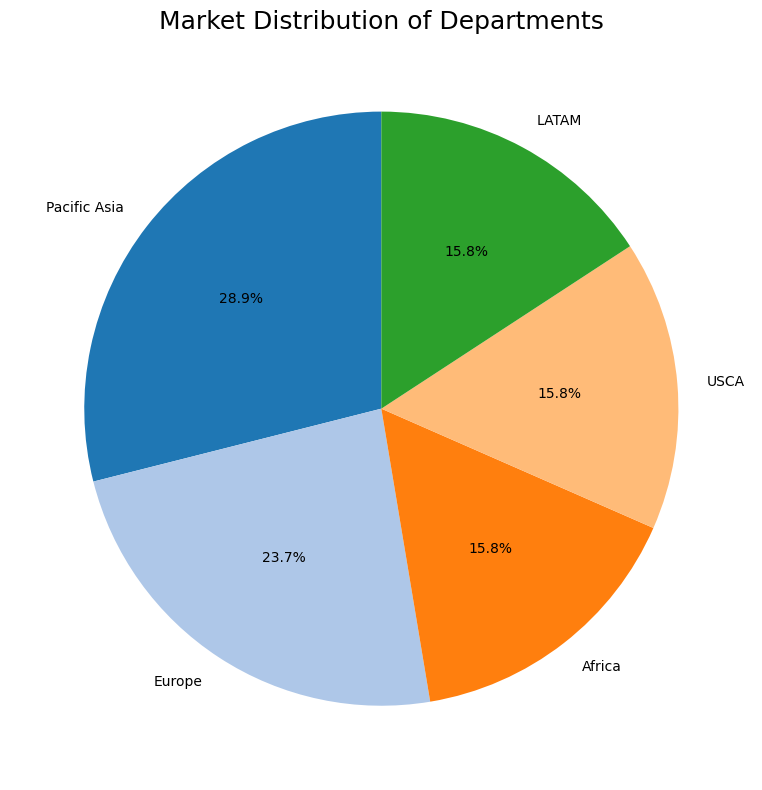

In [18]:

# 6. **Pie Chart 2: Market Distribution**
market_counts = late_delivery_analysis['Market'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab20", len(market_counts)))
plt.title('Market Distribution of Departments', fontsize=18)
plt.tight_layout()
plt.show()
